In [1]:
# Dataset being imported as dataframe
import pandas as pd
file = 'temperature.csv'
df = pd.read_csv(file)
df.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [2]:
df.shape

(45253, 37)

In [3]:
#Remove the top row, the whole row has NaNs, discarding it should not impact the dataset
df = df.drop(df.index[0])
df.shape

(45252, 37)

In [4]:
df.info()
#Dataframe info shows that columns-Vancouver, Miami, New York, Beersheba, Tel Aviv District, Eilat, 
#Haifa, Nahariyya, Jerusalem have around 700+ NaNs each

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45252 entries, 1 to 45252
Data columns (total 37 columns):
datetime             45252 non-null object
Vancouver            44458 non-null float64
Portland             45252 non-null float64
San Francisco        44460 non-null float64
Seattle              45250 non-null float64
Los Angeles          45250 non-null float64
San Diego            45252 non-null float64
Las Vegas            45252 non-null float64
Phoenix              45250 non-null float64
Albuquerque          45252 non-null float64
Denver               45252 non-null float64
San Antonio          45252 non-null float64
Dallas               45249 non-null float64
Houston              45250 non-null float64
Kansas City          45252 non-null float64
Minneapolis          45240 non-null float64
Saint Louis          45252 non-null float64
Chicago              45250 non-null float64
Nashville            45251 non-null float64
Indianapolis         45246 non-null float64
Atlanta     

In [5]:
df = df.set_index('datetime')

In [6]:
df.shape

(45252, 36)

In [7]:
#Removing few days worth of data from 5 years of data to remove NaNs
df = df[:-792]
df.shape

(44460, 36)

In [8]:
#Checking for NaNs, shows there are few NaNs
df.isnull().sum()

Vancouver             2
Portland              0
San Francisco         0
Seattle               2
Los Angeles           2
San Diego             0
Las Vegas             0
Phoenix               2
Albuquerque           0
Denver                0
San Antonio           0
Dallas                3
Houston               2
Kansas City           0
Minneapolis          12
Saint Louis           0
Chicago               2
Nashville             1
Indianapolis          6
Atlanta               5
Detroit               0
Jacksonville          0
Charlotte             2
Miami                12
Pittsburgh            2
Toronto               0
Philadelphia          2
New York              0
Montreal              2
Boston                2
Beersheba             5
Tel Aviv District     0
Eilat                 0
Haifa                 5
Nahariyya             4
Jerusalem             0
dtype: int64

In [10]:
df.columns

Index(['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles',
       'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver',
       'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis',
       'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta',
       'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh',
       'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston',
       'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya',
       'Jerusalem'],
      dtype='object')

In [13]:
# Forward filling the NaNs
col = ['Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem']
df[col] = df[col].ffill()

In [15]:
#Check for null values, no more NaNs
df.isnull().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [24]:
df.shape

(44460, 36)

(44460, 18)


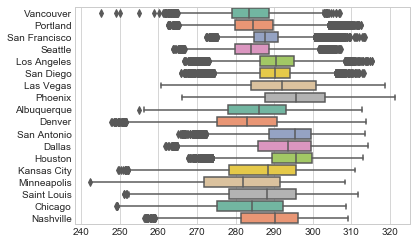

In [49]:
#Box plot for 1st 18 cities in the dataset showing the outliers
#Retaining the outliers, outliers in this case are the extreme temperatures and not necessarily data entry errors.
df_cities1 = df.iloc[:,0:18]
print(df_cities1.shape)
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(data=df_cities1, orient="h", palette="Set2")

(44460, 18)


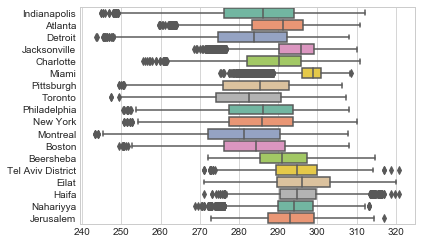

In [21]:
#Box plot for remaining 18 cities in the dataset
df_cities2 = df.iloc[:,18:36]
print(df_cities2.shape)
sns.set_style("whitegrid")
sns.boxplot(data=df_cities2, orient="h", palette="Set2")

In [23]:
#Saving cleaned data 
df.to_csv("Temperature_cleaned.csv")